# Extra Credit Assignment
## Author: Lei Cao

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Data Prep
## Read in the weather data
df = pd.read_csv('~/BDL_Jan2019.csv')
df.head()

,station,valid,lon,lat,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,gust,skyc1,skyc2,skyc3,skyc4,skyl1,skyl2,skyl3,skyl4,wxcodes,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar
0,BDL,1/1/2019 0:00,-72.6825,41.9381,M,M,M,110,5,0.01,30.17,M,7,M,BKN,OVC,M,M,2300,5000,M,M,#NAME?,M,M,M,M,M,M,M,KBDL 010000Z AUTO 11005KT 7SM -RA BKN023 OVC05...
1,BDL,1/1/2019 0:05,-72.6825,41.9381,M,M,M,120,4,0.01,30.16,M,6,M,BKN,BKN,OVC,M,2300,3500,5500,M,#NAME?,M,M,M,M,M,M,M,KBDL 010005Z AUTO 12004KT 6SM -RA BR BKN023 BK...
2,BDL,1/1/2019 0:10,-72.6825,41.9381,M,M,M,110,4,0.02,30.16,M,5,M,BKN,BKN,OVC,M,2300,3800,5000,M,RA BR,M,M,M,M,M,M,M,KBDL 010010Z AUTO 11004KT 5SM RA BR BKN023 BKN...
3,BDL,1/1/2019 0:15,-72.6825,41.9381,M,M,M,110,3,0.03,30.16,M,5,M,BKN,OVC,M,M,2100,5000,M,M,RA BR,M,M,M,M,M,M,M,KBDL 010015Z AUTO 11003KT 5SM RA BR BKN021 OVC...
4,BDL,1/1/2019 0:20,-72.6825,41.9381,M,M,M,100,3,0.04,30.15,M,5,M,BKN,BKN,OVC,M,1800,2300,5500,M,#NAME?,M,M,M,M,M,M,M,KBDL 010020Z AUTO 10003KT 5SM -RA BR BKN018 BK...


In [ ]:
## Subset these columns: station, valid, lon, lat, tmpf, dwpf, sknt, relh, drct, p01i, alti, mslp, gust
sub = df[['station', 'valid', 'lon', 'lat', 'tmpf', 'dwpf', 'sknt', 'relh', 'drct', 'p01i', 'alti', 'mslp', 'gust']]
sub

,station,valid,lon,lat,tmpf,dwpf,sknt,relh,drct,p01i,alti,mslp,gust
0,BDL,1/1/2019 0:00,-72.6825,41.9381,M,M,5,M,110,0.01,30.17,M,M
1,BDL,1/1/2019 0:05,-72.6825,41.9381,M,M,4,M,120,0.01,30.16,M,M
2,BDL,1/1/2019 0:10,-72.6825,41.9381,M,M,4,M,110,0.02,30.16,M,M
3,BDL,1/1/2019 0:15,-72.6825,41.9381,M,M,3,M,110,0.03,30.16,M,M
4,BDL,1/1/2019 0:20,-72.6825,41.9381,M,M,3,M,100,0.04,30.15,M,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9117,BDL,1/30/2019 23:40,-72.6825,41.9381,M,M,18,M,260,M,29.87,M,M
9118,BDL,1/30/2019 23:45,-72.6825,41.9381,M,M,19,M,260,M,29.88,M,M
9119,BDL,1/30/2019 23:50,-72.6825,41.9381,M,M,23,M,260,M,29.89,M,M
9120,BDL,1/30/2019 23:51,-72.6825,41.9381,16,5,23,61.23,270,T,29.89,1012.3,31


In [ ]:
## Clean up all the columns in subset
### 'M' and 'T' count as NA values
### Drop all NA rows
sub = sub.replace('M', np.nan)
sub = sub.replace('T', np.nan)
sub = sub.dropna()
sub

,station,valid,lon,lat,tmpf,dwpf,sknt,relh,drct,p01i,alti,mslp,gust
207,BDL,1/1/2019 15:51,-72.6825,41.9381,53.1,41,17,63.38,320,0,29.68,1005.2,26
220,BDL,1/1/2019 16:51,-72.6825,41.9381,51.1,33.1,19,49.98,310,0,29.74,1007.3,28
232,BDL,1/1/2019 17:51,-72.6825,41.9381,48.9,30.9,20,49.63,310,0,29.77,1008.1,30
244,BDL,1/1/2019 18:51,-72.6825,41.9381,46,30,17,53.37,330,0,29.81,1009.4,26
255,BDL,1/1/2019 19:51,-72.6825,41.9381,43,28.9,27,57.21,300,0,29.88,1011.9,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8141,BDL,1/27/2019 19:51,-72.6825,41.9381,44.1,27,14,50.73,190,0,29.9,1012.7,25
8297,BDL,1/28/2019 7:51,-72.6825,41.9381,24.1,10,13,54.36,340,0,30.06,1018,18
8950,BDL,1/30/2019 10:51,-72.6825,41.9381,25,15.1,13,65.58,330,0,29.8,1009.5,21
9053,BDL,1/30/2019 18:51,-72.6825,41.9381,27,7,14,42.11,230,0,29.77,1008.3,21


In [ ]:
## Convert date using proper format
### Create columns for MONTH, DAY and YEAR
import datetime
sub['MONTH'] = pd.DatetimeIndex(sub['valid']).month
sub['DAY'] = pd.DatetimeIndex(sub['valid']).day
sub['YEAR'] = pd.DatetimeIndex(sub['valid']).year
sub

,station,valid,lon,lat,tmpf,dwpf,sknt,relh,drct,p01i,alti,mslp,gust,MONTH,DAY,YEAR
207,BDL,1/1/2019 15:51,-72.6825,41.9381,53.1,41,17,63.38,320,0,29.68,1005.2,26,1,1,2019
220,BDL,1/1/2019 16:51,-72.6825,41.9381,51.1,33.1,19,49.98,310,0,29.74,1007.3,28,1,1,2019
232,BDL,1/1/2019 17:51,-72.6825,41.9381,48.9,30.9,20,49.63,310,0,29.77,1008.1,30,1,1,2019
244,BDL,1/1/2019 18:51,-72.6825,41.9381,46,30,17,53.37,330,0,29.81,1009.4,26,1,1,2019
255,BDL,1/1/2019 19:51,-72.6825,41.9381,43,28.9,27,57.21,300,0,29.88,1011.9,34,1,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8141,BDL,1/27/2019 19:51,-72.6825,41.9381,44.1,27,14,50.73,190,0,29.9,1012.7,25,1,27,2019
8297,BDL,1/28/2019 7:51,-72.6825,41.9381,24.1,10,13,54.36,340,0,30.06,1018,18,1,28,2019
8950,BDL,1/30/2019 10:51,-72.6825,41.9381,25,15.1,13,65.58,330,0,29.8,1009.5,21,1,30,2019
9053,BDL,1/30/2019 18:51,-72.6825,41.9381,27,7,14,42.11,230,0,29.77,1008.3,21,1,30,2019


In [ ]:
### Create a new column called MonthDay (It should be "MM-DD" format)
import random
sub['valid'] = pd.to_datetime(sub['valid'])
sub['MonthDay'] = sub['valid'].dt.strftime('%m-%d')
sub

,station,valid,lon,lat,tmpf,dwpf,sknt,relh,drct,p01i,alti,mslp,gust,MONTH,DAY,YEAR,MonthDay
207,BDL,2019-01-01 15:51:00,-72.6825,41.9381,53.1,41,17,63.38,320,0,29.68,1005.2,26,1,1,2019,01-01
220,BDL,2019-01-01 16:51:00,-72.6825,41.9381,51.1,33.1,19,49.98,310,0,29.74,1007.3,28,1,1,2019,01-01
232,BDL,2019-01-01 17:51:00,-72.6825,41.9381,48.9,30.9,20,49.63,310,0,29.77,1008.1,30,1,1,2019,01-01
244,BDL,2019-01-01 18:51:00,-72.6825,41.9381,46,30,17,53.37,330,0,29.81,1009.4,26,1,1,2019,01-01
255,BDL,2019-01-01 19:51:00,-72.6825,41.9381,43,28.9,27,57.21,300,0,29.88,1011.9,34,1,1,2019,01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8141,BDL,2019-01-27 19:51:00,-72.6825,41.9381,44.1,27,14,50.73,190,0,29.9,1012.7,25,1,27,2019,01-27
8297,BDL,2019-01-28 07:51:00,-72.6825,41.9381,24.1,10,13,54.36,340,0,30.06,1018,18,1,28,2019,01-28
8950,BDL,2019-01-30 10:51:00,-72.6825,41.9381,25,15.1,13,65.58,330,0,29.8,1009.5,21,1,30,2019,01-30
9053,BDL,2019-01-30 18:51:00,-72.6825,41.9381,27,7,14,42.11,230,0,29.77,1008.3,21,1,30,2019,01-30


In [ ]:
## Subset X and Y dataset
### X = tmpf, dwpf, sknt, relh, drct, p01i, alti, mslp
### Y = gust
subX = sub.iloc[:, 4:12]
subX = subX.reset_index(drop=True)
subX

,tmpf,dwpf,sknt,relh,drct,p01i,alti,mslp
0,53.1,41,17,63.38,320,0,29.68,1005.2
1,51.1,33.1,19,49.98,310,0,29.74,1007.3
2,48.9,30.9,20,49.63,310,0,29.77,1008.1
3,46,30,17,53.37,330,0,29.81,1009.4
4,43,28.9,27,57.21,300,0,29.88,1011.9
...,...,...,...,...,...,...,...,...
120,44.1,27,14,50.73,190,0,29.9,1012.7
121,24.1,10,13,54.36,340,0,30.06,1018
122,25,15.1,13,65.58,330,0,29.8,1009.5
123,27,7,14,42.11,230,0,29.77,1008.3


In [ ]:
subY = pd.DataFrame(sub['gust'])
subY = subY.reset_index(drop=True)
subY

,gust
0,26
1,28
2,30
3,26
4,34
...,...
120,25
121,18
122,21
123,21


In [ ]:
# Data Recoding
## Create a binary flag column for rows/observations that are cold (below 32 degF)
### If below 32 degF, call it 'COLD'; otherwise, call it 'HOT'
subX = subX.apply(pd.to_numeric)
subX.dtypes

tmpf    float64
dwpf    float64
sknt      int64
relh    float64
drct      int64
p01i    float64
alti    float64
mslp    float64
dtype: object

In [ ]:
subX['Flag_tmpf'] = np.where(subX['tmpf'] < 32, 'COLD', 'HOT') # recoding
subX

,tmpf,dwpf,sknt,relh,drct,p01i,alti,mslp,Flag_tmpf
0,53.1,41.0,17,63.38,320,0.0,29.68,1005.2,HOT
1,51.1,33.1,19,49.98,310,0.0,29.74,1007.3,HOT
2,48.9,30.9,20,49.63,310,0.0,29.77,1008.1,HOT
3,46.0,30.0,17,53.37,330,0.0,29.81,1009.4,HOT
4,43.0,28.9,27,57.21,300,0.0,29.88,1011.9,HOT
...,...,...,...,...,...,...,...,...,...
120,44.1,27.0,14,50.73,190,0.0,29.90,1012.7,HOT
121,24.1,10.0,13,54.36,340,0.0,30.06,1018.0,COLD
122,25.0,15.1,13,65.58,330,0.0,29.80,1009.5,COLD
123,27.0,7.0,14,42.11,230,0.0,29.77,1008.3,COLD


In [ ]:
## Create a binary flag column for rows/observations that are windy (wind above 20 miles per hour)
### If above 20 miles per hour, call it 'WINDY', otherwise call it 'CALM'
subY = subY.astype(int)
subY.dtypes

gust    int64
dtype: object

In [ ]:
subX['Flag_sknt'] = np.where(subX['sknt'] > 20, 'WINDY', 'CALM') # recoding
subX

,tmpf,dwpf,sknt,relh,drct,p01i,alti,mslp,Flag_tmpf,Flag_sknt
0,53.1,41.0,17,63.38,320,0.0,29.68,1005.2,HOT,CALM
1,51.1,33.1,19,49.98,310,0.0,29.74,1007.3,HOT,CALM
2,48.9,30.9,20,49.63,310,0.0,29.77,1008.1,HOT,CALM
3,46.0,30.0,17,53.37,330,0.0,29.81,1009.4,HOT,CALM
4,43.0,28.9,27,57.21,300,0.0,29.88,1011.9,HOT,WINDY
...,...,...,...,...,...,...,...,...,...,...
120,44.1,27.0,14,50.73,190,0.0,29.90,1012.7,HOT,CALM
121,24.1,10.0,13,54.36,340,0.0,30.06,1018.0,COLD,CALM
122,25.0,15.1,13,65.58,330,0.0,29.80,1009.5,COLD,CALM
123,27.0,7.0,14,42.11,230,0.0,29.77,1008.3,COLD,CALM


In [ ]:
# Aggregation
## Use your newly created binary flag columns to show the counts of each weather type
### You should have a 2*2 table with the count
pd.crosstab(subX['Flag_tmpf'], subX['Flag_sknt'])

Flag_sknt,CALM,WINDY
Flag_tmpf,,
COLD,70,4
HOT,48,3


In [ ]:
## Make a table that shows the average wind speed and average temperature per day
### You should have one row for each 'MM-DD'
sub[['sknt','tmpf']] = sub[['sknt','tmpf']].astype(float)

In [ ]:
table = sub.groupby([sub['valid'].dt.date])['sknt','tmpf'].mean() # calculating the averages
table = table.reset_index()

In [ ]:
from datetime import datetime
table['valid'] = table['valid'].apply(lambda x: x.strftime('%Y-%m-%d')) # convert the datatype for the valid column
table

,valid,sknt,tmpf
0,2019-01-01,17.875000,44.862500
1,2019-01-02,10.000000,37.000000
2,2019-01-03,15.666667,41.666667
3,2019-01-04,10.000000,39.000000
4,2019-01-06,14.800000,39.040000
5,2019-01-07,13.833333,25.683333
6,2019-01-09,15.142857,38.828571
7,2019-01-10,16.000000,30.176471
8,2019-01-11,13.900000,22.700000
9,2019-01-12,11.400000,17.380000


In [ ]:
table['valid'] = table['valid'].str.replace('2019-', '') # retain only the months and days
table = table.rename(columns={'valid': 'MonthDay'})
table.set_index('MonthDay', inplace=True)
table

,sknt,tmpf
MonthDay,,
01-01,17.875000,44.862500
01-02,10.000000,37.000000
01-03,15.666667,41.666667
01-04,10.000000,39.000000
01-06,14.800000,39.040000
01-07,13.833333,25.683333
01-09,15.142857,38.828571
01-10,16.000000,30.176471
01-11,13.900000,22.700000


In [ ]:
table = table.T # transpose the table
table

MonthDay,01-01,01-02,01-03,01-04,01-06,01-07,01-09,01-10,01-11,01-12,01-17,01-20,01-21,01-22,01-24,01-25,01-26,01-27,01-28,01-30
sknt,17.8750,10.0,15.666667,10.0,14.80,13.833333,15.142857,16.000000,13.9,11.40,13.00,15.50,16.684211,14.333333,14.80,15.888889,9.00,13.666667,13.0,11.666667
tmpf,44.8625,37.0,41.666667,39.0,39.04,25.683333,38.828571,30.176471,22.7,17.38,29.05,18.55,0.526316,6.655556,50.62,34.033333,29.45,42.700000,24.1,26.666667


Text(0.5, 1.0, 'Histogram of Wind Speed')

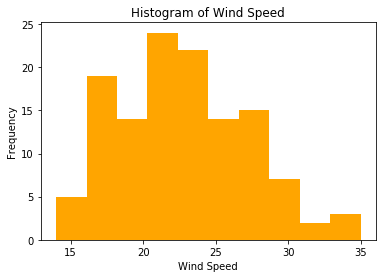

In [ ]:
# Plots
## Make a histogram or kernel density plot of the wind speed column
### Add descriptive labels and a title, change the color of the histogram
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

# histogram
plt.hist(subY['gust'],
         color='orange')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.title('Histogram of Wind Speed')

Text(0.5, 1.0, 'Kernel Density Plot of Wind Speed')

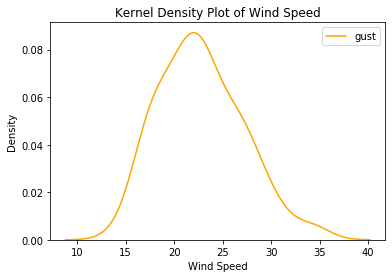

In [ ]:
# kernel density plot 
sns.kdeplot(subY['gust'],
            color='orange')
plt.xlabel('Wind Speed')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Wind Speed')

Text(0.5, 1.0, 'Histogram of Temperature')

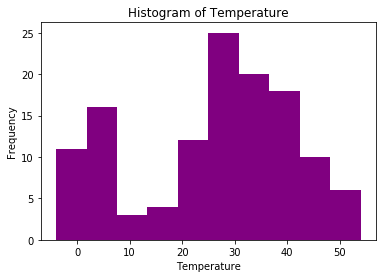

In [ ]:
## Make a histogram or kernel density plot of the temperature column
### Add descriptive labels and a title, change the color of the histogram

# histogram
plt.hist(subX['tmpf'],
         color='purple')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature')

Text(0.5, 1.0, 'Kernel Density Plot of Temperature')

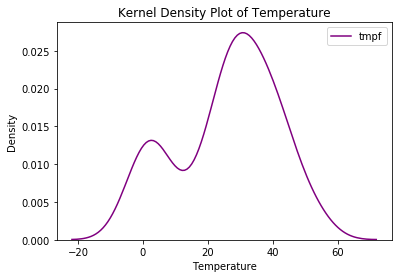

In [ ]:
# kernel density plot 
sns.kdeplot(subX['tmpf'],
            color='purple')
plt.xlabel('Temperature')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Temperature')

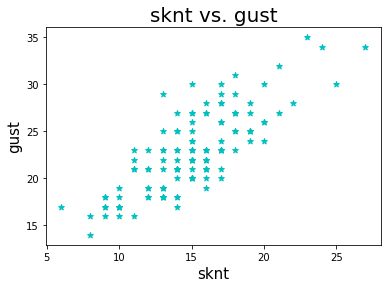

In [ ]:
## Make a basic scatterplot of sknt vs. gust
### Add descriptive labels and a title, change the color of plot symbol, change the plot symbol to something other than the default value
fig, ax = plt.subplots()
ax.scatter(x=subX['sknt'], y=subY['gust'], color='c', marker='*')
ax.set_xlabel("sknt", fontsize=15)
ax.set_ylabel("gust", fontsize=15)
ax.set_title("sknt vs. gust", fontsize=20)
plt.show()

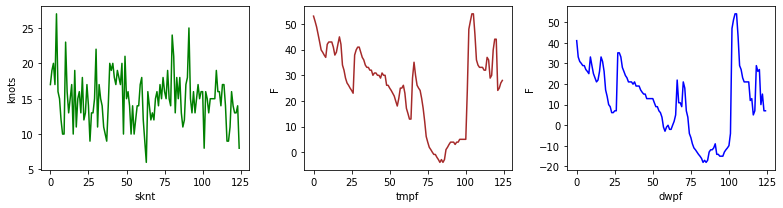

In [ ]:
## Make a line plot of the sknt, tmpf and dwpf (as a 3 panel plot), each having a different color
fig, axes = plt.subplots(1, 3, figsize=(11,3))

axes[0].plot(subX['sknt'],
             color='green')
axes[0].set_xlabel('sknt')
axes[0].set_ylabel('knots')

axes[1].plot(subX['tmpf'],
             color='brown')
axes[1].set_xlabel('tmpf')
axes[1].set_ylabel('F')

axes[2].plot(subX['dwpf'],
             color='blue')
axes[2].set_xlabel('dwpf')
axes[2].set_ylabel('F')

fig.tight_layout()
plt.show()

In [ ]:
# Modeling
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

In [ ]:
## Shuffle the data, then do an 80/20 split on the data (put random_stateint=7)
subX = subX.drop(columns=['Flag_tmpf','Flag_sknt'])

from sklearn.model_selection import train_test_split
subX_train, subX_test, subY_train, subY_test = train_test_split(subX,
                                                                subY,
                                                                test_size=0.2,
                                                                random_state=7)

print('subX_train', subX_train.shape,'subY_train', subY_train.shape)
print('subX_test ', subX_test.shape, 'subY_test ', subY_test.shape)

subX_train (100, 8) subY_train (100, 1)
subX_test  (25, 8) subY_test  (25, 1)


In [ ]:
## Create polynomial features (and interactions)
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)

X_poly = poly_features.fit_transform(subX)
X_poly = pd.DataFrame(X_poly)

print('Original Data')
print(subX.head())
print('##########################')
print('Poly Features')
print(X_poly.head())

Original Data
   tmpf  dwpf  sknt   relh  drct  p01i   alti    mslp
0  53.1  41.0    17  63.38   320   0.0  29.68  1005.2
1  51.1  33.1    19  49.98   310   0.0  29.74  1007.3
2  48.9  30.9    20  49.63   310   0.0  29.77  1008.1
3  46.0  30.0    17  53.37   330   0.0  29.81  1009.4
4  43.0  28.9    27  57.21   300   0.0  29.88  1011.9
##########################
Poly Features
    0     1     2     3      4   ...   40   41        42         43          44
0  1.0  53.1  41.0  17.0  63.38  ...  0.0  0.0  880.9024  29834.336  1010427.04
1  1.0  51.1  33.1  19.0  49.98  ...  0.0  0.0  884.4676  29957.102  1014653.29
2  1.0  48.9  30.9  20.0  49.63  ...  0.0  0.0  886.2529  30011.137  1016265.61
3  1.0  46.0  30.0  17.0  53.37  ...  0.0  0.0  888.6361  30090.214  1018888.36
4  1.0  43.0  28.9  27.0  57.21  ...  0.0  0.0  892.8144  30235.572  1023941.61

[5 rows x 45 columns]


In [ ]:
## Create log features
X_log = np.log(subX)
tmp = pd.DataFrame(X_log)
print(tmp.shape)
tmp.head()

(125, 8)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


,tmpf,dwpf,sknt,relh,drct,p01i,alti,mslp
0,3.972177,3.713572,2.833213,4.149148,5.768321,-inf,3.390473,6.912942
1,3.933784,3.499533,2.944439,3.911623,5.736572,-inf,3.392493,6.915029
2,3.889777,3.430756,2.995732,3.904595,5.736572,-inf,3.393501,6.915823
3,3.828641,3.401197,2.833213,3.977249,5.799093,-inf,3.394844,6.917111
4,3.761200,3.363842,3.295837,4.046729,5.703782,-inf,3.397189,6.919585


In [ ]:
X_log[np.isneginf(X_log)] = 0
X_log[np.isnan(X_log)] = 0
X_log.head()

,tmpf,dwpf,sknt,relh,drct,p01i,alti,mslp
0,3.972177,3.713572,2.833213,4.149148,5.768321,0.0,3.390473,6.912942
1,3.933784,3.499533,2.944439,3.911623,5.736572,0.0,3.392493,6.915029
2,3.889777,3.430756,2.995732,3.904595,5.736572,0.0,3.393501,6.915823
3,3.828641,3.401197,2.833213,3.977249,5.799093,0.0,3.394844,6.917111
4,3.761200,3.363842,3.295837,4.046729,5.703782,0.0,3.397189,6.919585


In [ ]:
## Join these two datasets together with the original variables
combined = subX.merge(X_poly, right_index=True, left_index=True).merge(X_log, right_index=True, left_index=True)
combined

,tmpf_x,dwpf_x,sknt_x,relh_x,drct_x,p01i_x,alti_x,mslp_x,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,tmpf_y,dwpf_y,sknt_y,relh_y,drct_y,p01i_y,alti_y,mslp_y
0,53.1,41.0,17,63.38,320,0.0,29.68,1005.2,1.0,53.1,41.0,17.0,63.38,320.0,0.0,29.68,1005.2,2819.61,2177.10,902.7,3365.478,16992.0,0.0,1576.008,53376.12,1681.00,697.0,2598.580,13120.0,0.0,1216.880,41213.20,289.0,1077.46,5440.0,0.0,504.56,17088.4,4017.0244,20281.6,0.0,1881.1184,63709.576,102400.0,0.0,9497.6,321664.0,0.0,0.0,0.0,880.9024,29834.336,1010427.04,3.972177,3.713572,2.833213,4.149148,5.768321,0.0,3.390473,6.912942
1,51.1,33.1,19,49.98,310,0.0,29.74,1007.3,1.0,51.1,33.1,19.0,49.98,310.0,0.0,29.74,1007.3,2611.21,1691.41,970.9,2553.978,15841.0,0.0,1519.714,51473.03,1095.61,628.9,1654.338,10261.0,0.0,984.394,33341.63,361.0,949.62,5890.0,0.0,565.06,19138.7,2498.0004,15493.8,0.0,1486.4052,50344.854,96100.0,0.0,9219.4,312263.0,0.0,0.0,0.0,884.4676,29957.102,1014653.29,3.933784,3.499533,2.944439,3.911623,5.736572,0.0,3.392493,6.915029
2,48.9,30.9,20,49.63,310,0.0,29.77,1008.1,1.0,48.9,30.9,20.0,49.63,310.0,0.0,29.77,1008.1,2391.21,1511.01,978.0,2426.907,15159.0,0.0,1455.753,49296.09,954.81,618.0,1533.567,9579.0,0.0,919.893,31150.29,400.0,992.60,6200.0,0.0,595.40,20162.0,2463.1369,15385.3,0.0,1477.4851,50032.003,96100.0,0.0,9228.7,312511.0,0.0,0.0,0.0,886.2529,30011.137,1016265.61,3.889777,3.430756,2.995732,3.904595,5.736572,0.0,3.393501,6.915823
3,46.0,30.0,17,53.37,330,0.0,29.81,1009.4,1.0,46.0,30.0,17.0,53.37,330.0,0.0,29.81,1009.4,2116.00,1380.00,782.0,2455.020,15180.0,0.0,1371.260,46432.40,900.00,510.0,1601.100,9900.0,0.0,894.300,30282.00,289.0,907.29,5610.0,0.0,506.77,17159.8,2848.3569,17612.1,0.0,1590.9597,53871.678,108900.0,0.0,9837.3,333102.0,0.0,0.0,0.0,888.6361,30090.214,1018888.36,3.828641,3.401197,2.833213,3.977249,5.799093,0.0,3.394844,6.917111
4,43.0,28.9,27,57.21,300,0.0,29.88,1011.9,1.0,43.0,28.9,27.0,57.21,300.0,0.0,29.88,1011.9,1849.00,1242.70,1161.0,2460.030,12900.0,0.0,1284.840,43511.70,835.21,780.3,1653.369,8670.0,0.0,863.532,29243.91,729.0,1544.67,8100.0,0.0,806.76,27321.3,3272.9841,17163.0,0.0,1709.4348,57890.799,90000.0,0.0,8964.0,303570.0,0.0,0.0,0.0,892.8144,30235.572,1023941.61,3.761200,3.363842,3.295837,4.046729,5.703782,0.0,3.397189,6.919585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,44.1,27.0,14,50.73,190,0.0,29.90,1012.7,1.0,44.1,27.0,14.0,50.73,190.0,0.0,29.90,1012.7,1944.81,1190.70,617.4,2237.193,8379.0,0.0,1318.590,44660.07,729.00,378.0,1369.710,5130.0,0.0,807.300,27342.90,196.0,710.22,2660.0,0.0,418.60,14177.8,2573.5329,9638.7,0.0,1516.8270,51374.271,36100.0,0.0,5681.0,192413.0,0.0,0.0,0.0,894.0100,30279.730,1025561.29,3.786460,3.295837,2.639057,3.926517,5.247024,0.0,3.397858,6.920375
121,24.1,10.0,13,54.36,340,0.0,30.06,1018.0,1.0,24.1,10.0,13.0,54.36,340.0,0.0,30.06,1018.0,580.81,241.00,313.3,1310.076,8194.0,0.0,724.446,24533.80,100.00,130.0,543.600,3400.0,0.0,300.600,10180.00,169.0,706.68,4420.0,0.0,390.78,13234.0,2955.0096,18482.4,0.0,1634.0616,55338.480,115600.0,0.0,10220.4,346120.0,0.0,0.0,0.0,903.6036,30601.080,1036324.00,3.182212,2.302585,2.564949,3.995629,5.828946,0.0,3.403195,6.925595
122,25.0,15.1,13,65.58,330,0.0,29.80,1009.5,1.0,25.0,15.1,13.0,65.58,330.0,0.0,29.80,1009.5,625.00,377.50,325.0,1639.500,8250.0,0.0,745.000,25237.50,228.01,196.3,990.258,4983.0,0.0,449.980,15243.45,169.0,852.54,4290.0,0.0,387.40,13123.5,4300.7364,21641.4,0.0,1954.2840,66203.010,108900.0,0.0,9834.0,333135.0,0.0,0.0,0.0,888.0400,30083.100,1019090.25,3.218876,2.714695,2.564949,4.183271,5.799093,0.0,3.394508,6.917210
123,27.0,7.0,14,42.11,230,0.0,29.77,1008.3,1.0,27.0,7.0,14.0,42.11,230.0,0.0,29.77,1008.3,729.00,189.00,378.0,1136.970,6210.0,0.0,803.790,27224.10,49.00,98

In [ ]:
## Fit an elasticNet on your new, giant dataset (your original data, the polynomial features and interactions, and the log features) with varying alpha values
## (0.01, 0.1, 1, 10, 100, 1000), which model gives you the best fit in terms of R2 and MAE? Show results in a table for training and validation results
combined_train, combined_test, subY_train, subY_test = train_test_split(combined,
                                                                        subY,
                                                                        test_size=0.2,
                                                                        random_state=7)

from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import ElasticNet,ElasticNetCV

alphas = [0.01, 0.1, 1, 10, 100, 1000]

result = []
for a in alphas:
  model = ElasticNet(alpha=a, l1_ratio=0.9).fit(combined, subY)
  train_score = model.score(combined, subY)
  pred_y1 = model.predict(combined)
  mae_train = mean_absolute_error(subY, pred_y1)
  
  elastic = ElasticNet(alpha=a).fit(combined_train, subY_train)
  test_score = elastic.score(combined_test, subY_test)
  pred_y2 = elastic.predict(combined_test)
  mae_test = mean_absolute_error(subY_test, pred_y2)

  result.append([train_score, mae_train, test_score, mae_test])

result = pd.DataFrame(result)
result['Alphas'] = [0.01, 0.1, 1, 10, 100, 1000]
result.set_index('Alphas', inplace=True)
result.columns = ['R2_Train','MAE_Train','R2_Test','MAE_Test']
print(result)

# According to the accuracy table, the best fit is the model with alpha value of 100, where the R2_Test value is the maximum and the MAE_Test value is the minimum.

         R2_Train  MAE_Train   R2_Test  MAE_Test
Alphas                                          
0.01     0.715546   1.805443  0.370581  2.664290
0.10     0.712806   1.819891  0.396553  2.649468
1.00     0.709676   1.824000  0.442776  2.475643
10.00    0.702487   1.853236  0.454044  2.519093
100.00   0.680740   1.929642  0.468472  2.461562
1000.00  0.632917   2.142957  0.439860  2.670868


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 327.01049784215263, tolerance: 0.22811680000000006
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199.1551210400969, tolerance: 0.17745900000000003
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 328.05603783184375, tolerance: 0.22811680000000006
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 203.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9826018400833618, tolerance: 0.17745900000000003
  positive)


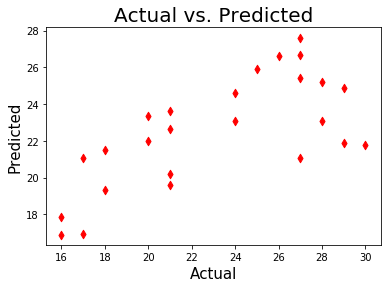

In [ ]:
## Show a scatterplot of actual vs. predicted for your best fitting model

# Scatterplot of the test Y dataset
best_fit = ElasticNet(alpha=100, l1_ratio=0.9).fit(combined_train, subY_train)
Pred = best_fit.predict(combined_test)

fig, ax = plt.subplots()
ax.scatter(x=subY_test, y=Pred, marker='d', color='red')
ax.set_xlabel('Actual', fontsize=15)
ax.set_ylabel('Predicted', fontsize=15)
ax.set_title("Actual vs. Predicted", fontsize=20)

plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.95815917786274, tolerance: 0.22811680000000006
  positive)


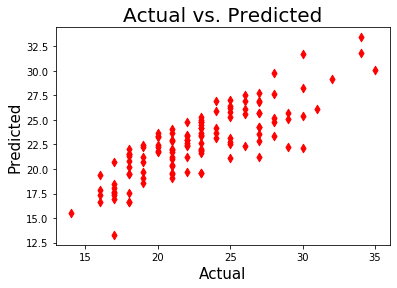

In [ ]:
# Scatterplot of the entire Y dataset
best_fit = ElasticNet(alpha=100, l1_ratio=0.9).fit(combined, subY)
Pred = best_fit.predict(combined)

fig, ax = plt.subplots()
ax.scatter(x=subY, y=Pred, marker='d', color='red')
ax.set_xlabel('Actual', fontsize=15)
ax.set_ylabel('Predicted', fontsize=15)
ax.set_title("Actual vs. Predicted", fontsize=20)

plt.show()

In [ ]:
## Do the same on the smaller dataset - what do the results look like? Did you need all of that feature engineering, or does this simpler model fit good enough?
subX_train, subX_test, subY_train, subY_test = train_test_split(subX,
                                                                subY,
                                                                test_size=0.2,
                                                                random_state=7)

alphas = [0.01, 0.1, 1, 10, 100, 1000]

result = []
for a in alphas:
  model = ElasticNet(alpha=a, l1_ratio=0.9).fit(subX, subY)
  train_score = model.score(subX, subY)
  pred_y1 = model.predict(subX)
  mae_train = mean_absolute_error(subY, pred_y1)
  
  elastic = ElasticNet(alpha=a).fit(subX_train, subY_train)
  test_score = elastic.score(subX_test, subY_test)
  pred_y2 = elastic.predict(subX_test)
  mae_test = mean_absolute_error(subY_test, pred_y2)

  result.append([train_score, mae_train, test_score, mae_test])

result = pd.DataFrame(result)
result['Alphas'] = [0.01, 0.1, 1, 10, 100, 1000]
result.set_index('Alphas', inplace=True)
result.columns = ['R2_Train','MAE_Train','R2_Test','MAE_Test']
print(result)

# According to the accuracy table, the results of the model for the original dataset are slightly worse than those of the larger dataset:
# larger dataset: max R2_Test = 0.47, min MAE_Test = 2.46
# original dataset: max R2_Test = 0.46, min MAE_Test = 2.62
# In conclusion, we do not need all of that feature engineering, and the simpler model fits good enough.

         R2_Train  MAE_Train   R2_Test  MAE_Test
Alphas                                          
0.01     0.646294   2.111754  0.455388  2.621089
0.10     0.642171   2.121662  0.446426  2.660908
1.00     0.631896   2.143532  0.439905  2.670969
10.00    0.261197   2.956971  0.306682  3.217281
100.00   0.000000   3.417728 -0.006793  4.091600
1000.00  0.000000   3.417728 -0.006793  4.091600


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 244.28465313755896, tolerance: 0.22811680000000006
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 179.65282614379157, tolerance: 0.17745900000000003
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.150187897419187, tolerance: 0.22811680000000006
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.86